In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
data = pd.read_excel("factbook.xlsx")
data = data[["Country","Exports","Imports", "Industrial production growth rate", "Investment" , "Unemployment rate"]]
data.head()

,Country,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,Albania,"$552,400,000.00","$2,076,000,000.00",3.1,18.4,14.8
1,Algeria,"$32,160,000,000.00","$15,250,000,000.00",6,26.2,25.4
2,Angola,"$12,760,000,000.00","$4,896,000,000.00",1,34.5,
3,Argentina,"$33,780,000,000.00","$22,060,000,000.00",12,18.3,14.8
4,Armenia,"$850,000,000.00","$1,300,000,000.00",15,19.8,30


In [3]:
data['Exports'] = data['Exports'].astype(str).str.replace(r'\$|,|\.\d{2}', '', regex=True)
data['Imports'] = data['Imports'].astype(str).str.replace(r'\$|,|\.\d{2}', '', regex=True)
data.head()

,Country,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,Albania,552400000,2076000000,3.1,18.4,14.8
1,Algeria,32160000000,15250000000,6,26.2,25.4
2,Angola,12760000000,4896000000,1,34.5,
3,Argentina,33780000000,22060000000,12,18.3,14.8
4,Armenia,850000000,1300000000,15,19.8,30


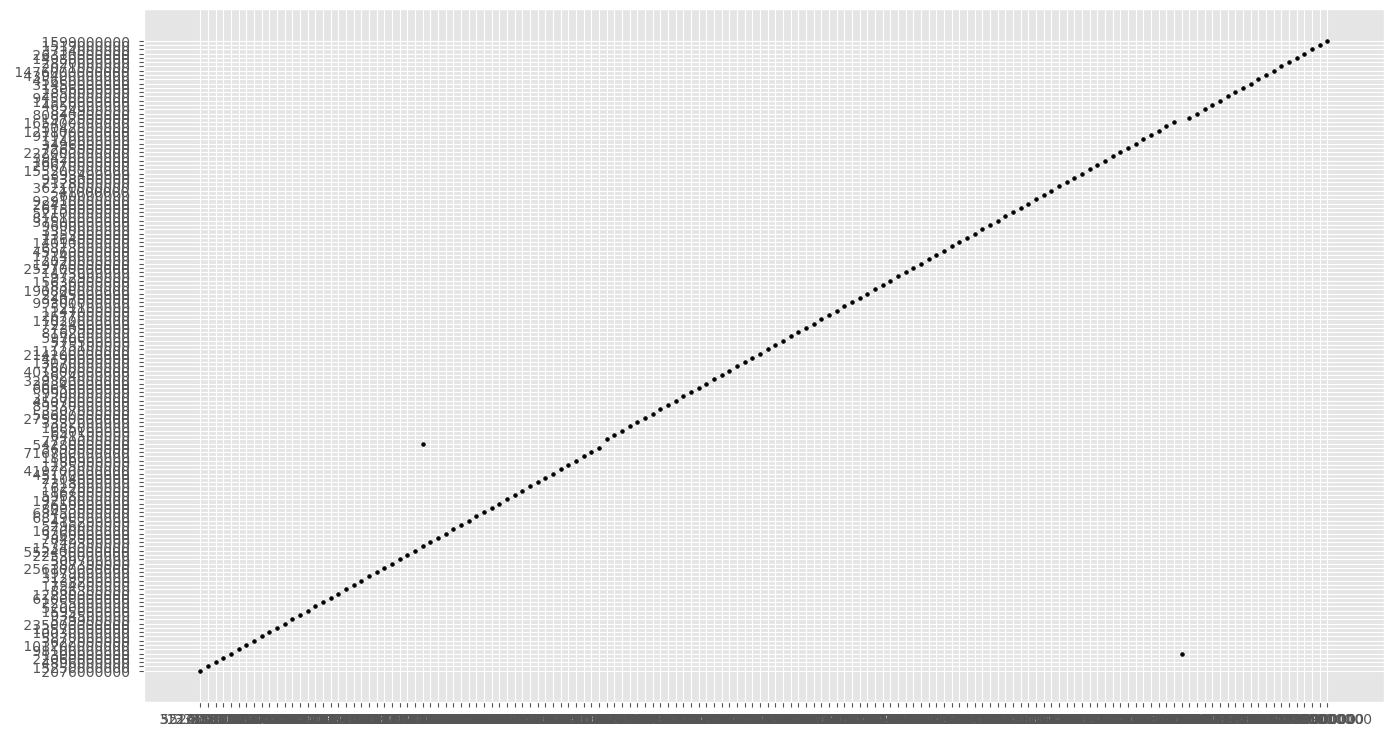

In [4]:
e1 = data["Exports"].values
i1 = data["Imports"].values
X = np.array(list(zip(e1, i1)))
plt.scatter(e1, i1, c='black', s=7)